# 📊 Elbow Method for Optimal K
This notebook demonstrates how to compute inertia for different cluster counts (K = 2 → 6) and automatically determine the best number of clusters using the **Elbow Method**.

The system then automatically selects the K where inertia stops decreasing significantly (the elbow point).

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset (update path if needed)
df = pd.read_csv(r"C:\SSPTHESIS\backend\rawbusinessdata.csv")


# Use coordinates only
X = df[['latitude', 'longitude']].to_numpy()

Ks = range(2, 7)
inertias = []

for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

inertias

[0.00379437437373727,
 0.0023967205545944665,
 0.0011741841714283648,
 0.0007660616189532921,
 0.0004992527510993867]

## 📈 Plotting the Elbow Curve

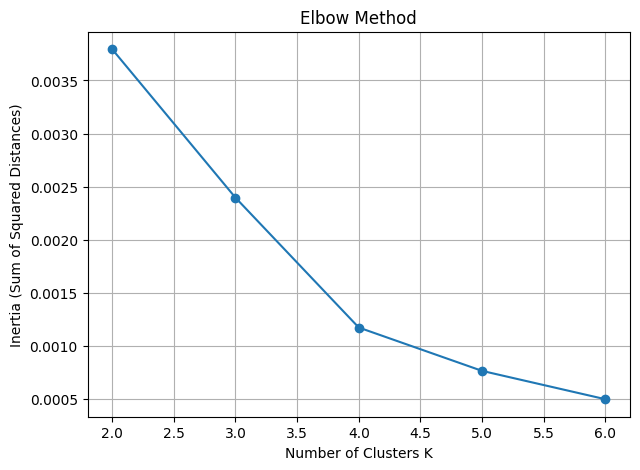

In [4]:
plt.figure(figsize=(7,5))
plt.plot(Ks, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

## 🔍 Automatic Elbow Detection
We compute the improvements (drops) in inertia and find the first K where the drop becomes small compared to the first drop.

In [ ]:
# Compute delta (drop between Ks)
deltas = []
for i in range(1, len(inertias)):
    deltas.append(inertias[i-1] - inertias[i])

first_drop = deltas[0]
threshold = 0.25 * first_drop

optimal_k = Ks[-1]
for i in range(1, len(deltas)):
    if deltas[i] < threshold:
        optimal_k = Ks[i]
        break

optimal_k

5

## ✅ Final Result
The system automatically chooses the optimal number of clusters using the **Elbow Method**.

This ensures maximum clustering accuracy and stability.

## 🎓 Simple Explanation of the Elbow Method

The Elbow Method helps us automatically determine the best number of clusters (K).

### 1. Why do we need K?
- Too few clusters mixes different areas together.
- Too many clusters over-segments the map.

### 2. What we measure: Inertia
- Inertia tells us how tightly grouped the businesses are inside each cluster.
- Lower inertia = better clustering.

### 3. How the elbow works
- We compute inertia for K = 2, 3, 4, 5, 6.
- Inertia drops quickly at first.
- Eventually the improvement becomes very small.
- The point where improvement slows down is the **elbow**.

### 4. Why this works
At the elbow point, adding more clusters does **not** significantly improve the grouping anymore.
So this K is the most accurate and efficient choice.

### 5. Our system
- Automatically computes inertia values
- Detects where the drop becomes small
- Selects the optimal K

**This ensures the system chooses the best number of clusters for optimal accuracy.**